# Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib as mpl
mpl.style.use("seaborn")


# Criando um database dos arquivos dos exercícios

In [2]:
import shutil, os
import csv
from PIL import Image

exercicios = {}
users = []
for i in range (1,400):
    
    if i <10:
        user= "00"+ str(i)
    
    elif i<100:
        user= "0"+ str(i)
        
    else:
        user=str(i)
        

    path = 'backup/user_' + user
    
    users.append(path)
    
    
    data=[]
    for filename in os.listdir(path):
        data.append(filename)
        #writer.writerow(data)
        #########################
#         if "ch3_" in filename:
#             print(filename)
# #             os.mkdir('pasta')
#             f = path+'/'+filename

#             shutil.copy(f, 'pasta')
            
        #########################
    exercicios[int(user)]=data
    data=[]


In [3]:
dict={}
lista=[]
for k in exercicios.keys():
    exs={}
    for l in exercicios[k]:
            p=l.find('_')
            numero=int(l[2:p])          
            if numero not in exs:
                exs[numero] = 1
                lista.append(numero)
            else:
                exs[numero] += 1
    dict[k]=exs

In [4]:
from collections import OrderedDict 
dict1 = OrderedDict(sorted(dict.items())) 


In [5]:
dados = pd.DataFrame.from_dict(dict1) 


In [6]:
dados=dados.T

In [7]:
df = dados.reindex(columns=sorted(dados.columns))


In [8]:
df=df.fillna(0)


In [9]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,172,173,174,175,176,177,178,179,180,181
1,1.0,1.0,7.0,3.0,21.0,2.0,14.0,4.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,5.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,7.0,3.0,3.0,1.0,1.0,1.0,2.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,15.0,5.0,2.0,6.0,2.0,0.0,0.0,2.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,5.0,7.0,2.0,1.0,2.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Análise exploratória   - Quantos fizeram?

## Escreva o número do exercício:

In [10]:
numero_exercicio = 3

## Escreva o nome do exercício (mesmo da pasta no repositório)

In [11]:
nome_exercicio = "gaussiana"

In [12]:
exercicio3=df[numero_exercicio]
total = exercicio3.count()
naoFeito = exercicio3.isna().sum()
feito=total-naoFeito
naoFeito

0

In [13]:
tentativas_ex3 = exercicio3.value_counts()

total_tentativas=tentativas_ex3.sum()
naoFeitos_ex3 = tentativas_ex3[0]

feitos=total-naoFeitos_ex3
print(f"Porcentagem dos que fizeram: {(feitos/(total_tentativas))*100}%")

Porcentagem dos que fizeram: 79.9498746867168%


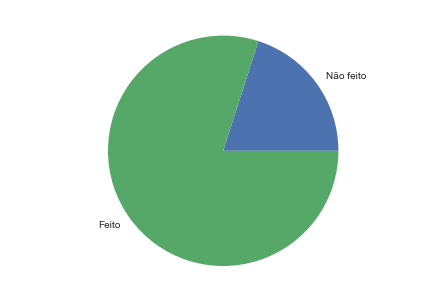

In [14]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie((naoFeitos_ex3,feitos), labels = ('Não feito', 'Feito'))
plt.show()

# Quantidade de tentativas

Text(0, 0.5, 'Alunos')

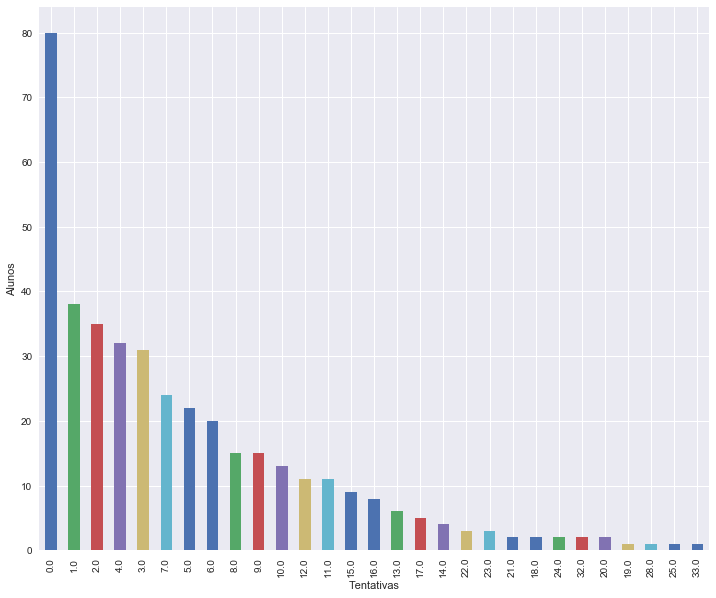

In [15]:
fig=plt.figure(figsize=(12,10))
tentativas_ex3.plot(kind='bar',  legend=False)
plt.xlabel('Tentativas')
plt.ylabel('Alunos')


## Média de tentativas

In [16]:
print(f"Média: {int(np.mean(tentativas_ex3))}")

Média: 13


# Analisando os erros

In [17]:
json_results= "exercicios/analise-exercicios/"+ nome_exercicio + "/resultado.json"
json_results

'exercicios/analise-exercicios/gaussiana/resultado.json'

In [18]:
df_exs = pd.read_json(json_results, orient='records')
df_exs = df_exs.rename(columns = {'id':'id','erros':'erros', 'resultado':'passou'})


In [19]:
#df_exs=df_exs.set_index('id')
df_exs.tail(4)

,detalhes,erros,id,linha,passou
2313,return a * b,SyntaxError: invalid syntax,ch3_2020_03_04_20_08_39_273348.py,'line 6,False
2314,def x,SyntaxError: invalid syntax,ch3_2019_09_11_23_12_24_127271.py,'line 1,False
2315,B = math.e0.5*x-mi)/sigma)2),SyntaxError: invalid syntax,ch3_2020_03_04_19_49_40_592877.py,'line 4,False
2316,,AssertionError: <|><Verificar quando x ou mi é...,ch3_2020_09_04_16_47_36_060892.py,,False


In [20]:
id = df_exs["id"]


In [21]:
r = df_exs["passou"]


In [22]:
df_erros=df_exs[df_exs['passou']==False]

df_erros.head()

,detalhes,erros,id,linha,passou
1,y=1/σ*2import.pi)**1/2)import exp-0.5x-μ)/...,SyntaxError: invalid syntax,ch3_2019_08_13_16_52_03_378932.py,'line 3,False
2,,TypeError: \'float\' object is not callable,ch3_2020_03_09_19_11_49_185208.py,,False
3,if x,SyntaxError: invalid syntax,ch3_2020_02_28_17_44_32_436097.py,'line 3,False
4,y=1/sigma*2*math.pi)**0.5)math.e**-0.5*x-m...,SyntaxError: invalid syntax,ch3_2019_03_01_12_59_50_648548.py,'line 3,False
5,,TypeError: \'float\' object is not callable,ch3_2020_02_20_00_11_13_695953.py,,False


In [38]:
for ind in df_erros.index: 
    line = df_erros["erros"][ind]
    if ":" in line:
        item = line.split(":") 
        detail = line[((line.find(':'))+2):]
        
        df_erros["erros"][ind] = item
        df_erros["detalhes"][ind] = detail
        

df_erros.head()

,detalhes,erros,id,linha,passou
1,y=1/σ*2import.pi)**1/2)import exp-0.5x-μ)/...,SyntaxError,ch3_2019_08_13_16_52_03_378932.py,'line 3,False
2,,TypeError,ch3_2020_03_09_19_11_49_185208.py,,False
3,if x,SyntaxError,ch3_2020_02_28_17_44_32_436097.py,'line 3,False
4,y=1/sigma*2*math.pi)**0.5)math.e**-0.5*x-m...,SyntaxError,ch3_2019_03_01_12_59_50_648548.py,'line 3,False
5,,TypeError,ch3_2020_02_20_00_11_13_695953.py,,False


In [40]:
df_erros['erros'] = [''.join(map(str, l)) for l in df_erros['erros']]
df_erros.head()


,detalhes,erros,id,linha,passou
1,y=1/σ*2import.pi)**1/2)import exp-0.5x-μ)/...,SyntaxError,ch3_2019_08_13_16_52_03_378932.py,'line 3,False
2,,TypeError,ch3_2020_03_09_19_11_49_185208.py,,False
3,if x,SyntaxError,ch3_2020_02_28_17_44_32_436097.py,'line 3,False
4,y=1/sigma*2*math.pi)**0.5)math.e**-0.5*x-m...,SyntaxError,ch3_2019_03_01_12_59_50_648548.py,'line 3,False
5,,TypeError,ch3_2020_02_20_00_11_13_695953.py,,False


In [41]:
num = [0,1,2,3,4,5,6,7,8,9]
tipos_erros = ["AssertionError","SyntaxError", "IndentationError", "TypeError", "NameError", "PriorityError", "ModuleNotFoundError", "TabError", "UnboundLocalError", "AttributeError", "ZeroDivisionError", "OverflowError"]
tipos = []
for ind in df_erros.index: 
#     erro = "AssertionError:"
#     for n in num:
#         if str(n) in df_erros["erros"][ind]:
#             erro+=(str(n)+"/")
#     if (erro !=  ("AssertionError:")):
#         df_erros["erros"][ind] = erro
    for e in tipos_erros:
        if e in  df_erros["erros"][ind]:
            df_erros["erros"][ind] = e
    
#     elif  "SyntaxError" in df_erros["erros"][ind]:
#         df_erros["erros"][ind] = "SyntaxError"
    
#     elif "IndentationError" in df_erros["erros"][ind]:
#         df_erros["erros"][ind] = "IndentationError"
        
#     else: 
#         if df_erros["erros"][ind] not in tipos:
#             tipos.append(df_erros["erros"][ind])

            
            
print(tipos)
df_erros.head()

[]


,detalhes,erros,id,linha,passou
1,y=1/σ*2import.pi)**1/2)import exp-0.5x-μ)/...,SyntaxError,ch3_2019_08_13_16_52_03_378932.py,'line 3,False
2,,TypeError,ch3_2020_03_09_19_11_49_185208.py,,False
3,if x,SyntaxError,ch3_2020_02_28_17_44_32_436097.py,'line 3,False
4,y=1/sigma*2*math.pi)**0.5)math.e**-0.5*x-m...,SyntaxError,ch3_2019_03_01_12_59_50_648548.py,'line 3,False
5,,TypeError,ch3_2020_02_20_00_11_13_695953.py,,False


In [42]:
df_erros.head()

,detalhes,erros,id,linha,passou
1,y=1/σ*2import.pi)**1/2)import exp-0.5x-μ)/...,SyntaxError,ch3_2019_08_13_16_52_03_378932.py,'line 3,False
2,,TypeError,ch3_2020_03_09_19_11_49_185208.py,,False
3,if x,SyntaxError,ch3_2020_02_28_17_44_32_436097.py,'line 3,False
4,y=1/sigma*2*math.pi)**0.5)math.e**-0.5*x-m...,SyntaxError,ch3_2019_03_01_12_59_50_648548.py,'line 3,False
5,,TypeError,ch3_2020_02_20_00_11_13_695953.py,,False


In [43]:
erros_count = df_erros["erros"].value_counts().to_frame()
erros_count

,erros
SyntaxError,676
TypeError,443
AssertionError,421
NameError,198
PriorityError,83
IndentationError,58
OverflowError,52
ZeroDivisionError,29
TabError,28
ModuleNotFoundError,13


Text(0, 0.5, 'Quantidade')

<Figure size 864x576 with 0 Axes>

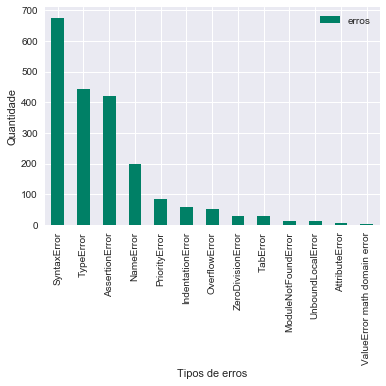

In [44]:
plt.figure(figsize=(12, 8))
sns.despine()
ax = erros_count.plot(kind='bar',colormap='summer')
plt.xlabel('Tipos de erros')
plt.ylabel('Quantidade')
# x_labels = ["AssertionError", "SyntaxError", "IndentationError"]
#ax.legend(x_labels)
# ax.set_xticklabels(x_labels)

## Adicionando os IDs dos usuários ao dataframe

In [45]:
import os

def list_files(dir):
    r = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            r.append(os.path.join(root, name))
    return r

In [46]:
dir = r"C:\Users\gabic\Documents\NINJA_DeSoft\submissoes_servidor\backup"
files = list_files(dir)

In [47]:
lista_files = []
for f in files:
    f = f[65:]
    f.replace("//","/")
    lista_files.append(f)
    
lista_files= lista_files[1:]

In [48]:
df_erros["usuario"]="0"


In [49]:
 for ind in df_erros.index: 
        for l in lista_files:
            user = l[0:8]
            ex = l[9:]
            if ex == df_erros["id"][ind]:
                df_erros["usuario"][ind] = user
#                 print(user)
#                 print(ex)


In [82]:
df_erros.head(10)

,detalhes,erros,id,linha,passou,usuario
1,y=1/σ*2import.pi)**1/2)import exp-0.5x-μ)/...,SyntaxError,ch3_2019_08_13_16_52_03_378932.py,'line 3,False,user_086
2,,TypeError,ch3_2020_03_09_19_11_49_185208.py,,False,user_093
3,if x,SyntaxError,ch3_2020_02_28_17_44_32_436097.py,'line 3,False,user_321
4,y=1/sigma*2*math.pi)**0.5)math.e**-0.5*x-m...,SyntaxError,ch3_2019_03_01_12_59_50_648548.py,'line 3,False,user_236
5,,TypeError,ch3_2020_02_20_00_11_13_695953.py,,False,user_282
7,"print(calcula_gaussiana(0,0,1))",SyntaxError,ch3_2020_03_18_23_48_15_310305.py,('line 10,False,user_230
8,,TypeError,ch3_2020_03_09_19_12_34_148097.py,,False,user_326
9,,ZeroDivisionError,ch3_2019_02_28_20_34_50_737526.py,,False,user_332
10,,TypeError,ch3_2020_10_05_02_48_24_793517.py,,False,user_363
11,return 1/sigma*math.sqrt2*math.pi))*math.e...,SyntaxError,ch3_2019_03_30_20_28_09_678811.py,line 6,False,user_154


In [88]:
users_count = df_erros["usuario"].value_counts()


In [52]:
# f, ax = plt.subplots(figsize = (32,20))
# plt.figure(figsize = (640,200))
erros = df_erros["erros"]
users = df_erros["usuario"]
table = pd.crosstab(erros, users)
# plot=sns.heatmap(table,ax=ax, annot=True, cmap="YlGnBu")
# f.savefig("heatmap.png", dpi=200)
table

usuario,user_001,user_003,user_004,user_005,user_006,user_007,user_009,user_010,user_011,user_012,...,user_380,user_382,user_383,user_385,user_386,user_391,user_393,user_394,user_395,user_399
erros,,,,,,,,,,,,,,,,,,,,,
AssertionError,5,0,0,0,0,5,2,0,0,1,...,0,0,3,0,0,0,0,0,0,0
AttributeError,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
IndentationError,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ModuleNotFoundError,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NameError,0,0,0,1,3,1,2,0,0,1,...,1,2,1,0,0,4,0,1,0,0
OverflowError,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PriorityError,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,5,0,0,0
SyntaxError,0,2,4,0,3,1,1,0,2,2,...,0,0,2,1,1,2,2,0,2,1
TabError,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Digite o ID de um usuário para descobrir seus principais erros

### Selecione o usuário:

In [89]:
usuario = "user_086"

In [90]:
table[usuario]

erros
AssertionError                   0
AttributeError                   0
IndentationError                 6
ModuleNotFoundError              0
NameError                        0
OverflowError                    0
PriorityError                    0
SyntaxError                     13
TabError                         3
TypeError                        1
UnboundLocalError                0
ValueError math domain error     0
ZeroDivisionError                0
Name: user_086, dtype: int64

In [91]:
errors = df_erros.loc[df_erros["usuario"]==usuario]
errors.loc[:, ["erros","linha","detalhes"]]

,erros,linha,detalhes
1,SyntaxError,'line 3,y=1/σ*2import.pi)**1/2)import exp-0.5x-μ)/...
196,SyntaxError,'line 3,y=1/σ2import pi)**1/2)import exp-0.5x-μ)/σ))
251,SyntaxError,('line 1,"def calcula_gaussiana f(x,μ,σ):"
539,TabError,line 5,inconsistent use of tabs and spaces in indenta...
545,TabError,line 4,inconsistent use of tabs and spaces in indenta...
566,SyntaxError,'line 3,invalid syntax
676,SyntaxError,'line 3,invalid syntax
707,IndentationError,line 4,unindent does not match any outer indentation ...
869,SyntaxError,'line 3,invalid syntax
1021,IndentationError,line 4,unindent does not match any outer indentation ...
